1.补充高维度 softmax

In [20]:
import torch
x=torch.tensor([[[1,2,3,4],[4,5,6,7],[7,8,9,10]],[[1,2,3,5],[4,5,6,8],[7,8,9,4]]],dtype=torch.float32)
x

tensor([[[ 1.,  2.,  3.,  4.],
         [ 4.,  5.,  6.,  7.],
         [ 7.,  8.,  9., 10.]],

        [[ 1.,  2.,  3.,  5.],
         [ 4.,  5.,  6.,  8.],
         [ 7.,  8.,  9.,  4.]]])

In [21]:
x.size()

torch.Size([2, 3, 4])

In [22]:
x.size(0)

2

In [23]:
x.size(2)

4

In [ ]:
torch.softmax(x,dim=0)# 示例：计算位置[0,0,0]和[1,0,0]的softmax softmax([1, 1]) = [e¹/(e¹+e¹), e¹/(e¹+e¹)] ≈ [0.5, 0.5]

tensor([[[0.5000, 0.5000, 0.5000, 0.2689],
         [0.5000, 0.5000, 0.5000, 0.2689],
         [0.5000, 0.5000, 0.5000, 0.9975]],

        [[0.5000, 0.5000, 0.5000, 0.7311],
         [0.5000, 0.5000, 0.5000, 0.7311],
         [0.5000, 0.5000, 0.5000, 0.0025]]])

In [ ]:
torch.softmax(x,dim=1)# 示例：第一个矩阵的第一列[1,4,7]的softmax softmax([1,4,7]) = [e¹/(e¹+e⁴+e⁷), e⁴/(e¹+e⁴+e⁷), e⁷/(e¹+e⁴+e⁷)]

tensor([[[0.0024, 0.0024, 0.0024, 0.0024],
         [0.0473, 0.0473, 0.0473, 0.0473],
         [0.9503, 0.9503, 0.9503, 0.9503]],

        [[0.0024, 0.0024, 0.0024, 0.0466],
         [0.0473, 0.0473, 0.0473, 0.9362],
         [0.9503, 0.9503, 0.9503, 0.0171]]])

In [ ]:
torch.softmax(x,dim=2)# 示例：第一个矩阵的第一行[1,2,3,4]的softmax softmax([1,2,3,4]) = [e¹/Σ, e²/Σ, e³/Σ, e⁴/Σ] (Σ=e¹+e²+e³+e⁴)

tensor([[[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]],

        [[0.0152, 0.0414, 0.1125, 0.8310],
         [0.0152, 0.0414, 0.1125, 0.8310],
         [0.0896, 0.2436, 0.6623, 0.0045]]])

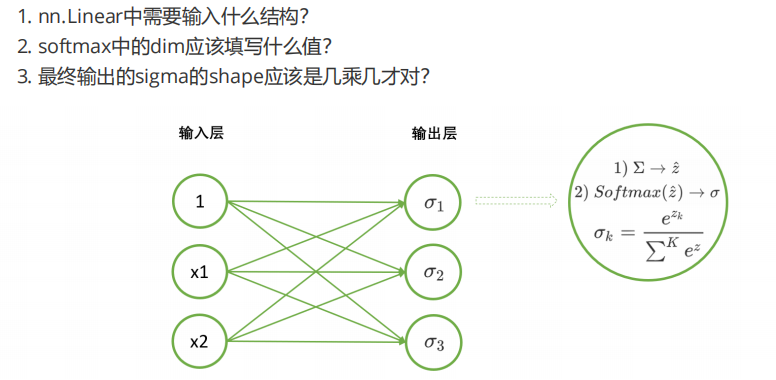

In [ ]:
#采用torch.nn.function.softmax 实现多分类正向传播
import torch
from torch.nn import functional as F
X=torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32)
torch.random.manual_seed(420)
tense=torch.nn.Linear(3,3)
zhat=tense(X)
y=torch.softmax(zhat,dim=1)# torch.softmax(input, dim=None, dtype=None)
                           # F.softmax(input, dim=None, dtype=None, _stacklevel=3)
print(zhat) 
print(y)

tensor([[ 0.8594, -2.3388, -0.0968],
        [ 2.5231, -5.4367,  1.0249],
        [ 4.1867, -8.5346,  2.1466]], grad_fn=<AddmmBackward0>)
tensor([[7.0167e-01, 2.8652e-02, 2.6968e-01],
        [8.1707e-01, 2.8535e-04, 1.8265e-01],
        [8.8494e-01, 2.6431e-06, 1.1506e-01]], grad_fn=<SoftmaxBackward0>)


In [ ]:
# 导入PyTorch库及其神经网络函数模块
import torch  # PyTorch深度学习框架核心库
from torch.nn import functional as F  # 包含激活函数、损失函数等神经网络操作

# 定义输入数据矩阵，3个样本，每个样本3个特征
X = torch.tensor([[1,2,3],[4,5,6],[7,8,9]], dtype=torch.float32)  
# 批注：创建3x3浮点张量，3个样本(行)，3个特征(列)，float32是标准神经网络输入类型

# 设置随机种子保证结果可复现
torch.random.manual_seed(420)  
# 批注：固定随机数生成器的种子，确保每次运行线性层的权重初始化相同

# 创建全连接层（线性变换层）
tense = torch.nn.Linear(3,3)  
# 批注：输入维度=3，输出维度=3，自动初始化权重矩阵W(3x3)和偏置b(3x1)
# 实际创建参数：weight.shape=(3,3), bias.shape=(3,)

# 执行线性变换：z = XW^T + b
zhat = tense(X)  
# 批注：数学公式：zhat = X @ tense.weight.T + tense.bias
# 计算过程：矩阵乘法(X·W^T)后加偏置，输出3个样本在3个类别上的原始分数(logits)

# 对线性输出应用softmax激活
y = torch.softmax(zhat, dim=1)  
# 批注：沿dim=1(行方向)计算softmax，使每行3个类别的概率和为1
# 计算公式：softmax(z_i) = exp(z_i)/sum(exp(z_j)) for j in 1..3

# 打印线性层输出和softmax概率
print(zhat)  # 输出原始logits（未归一化的类别分数）
print(y)     # 输出概率分布（每行和为1）
# 批注：zhat反映模型原始预测强度，y是归一化后的分类概率

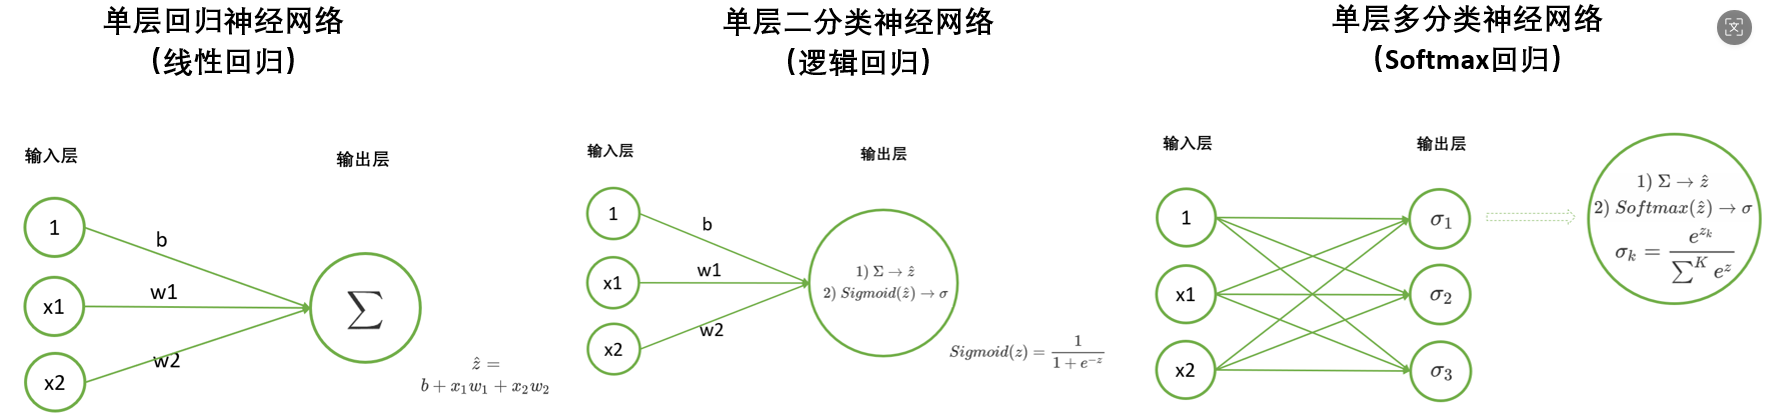